# Executive Summary

Analyzing the Mobile App Research Survey the respondents can be grouped into four customer segments. 

Cluster 0 This cluster of individuals tends to keep up with technology and enjoy being informed on the latest electronics and gadgets. However, the cluster has a tendency to believe that there is too much technology in everyday life therefor needs to be offered a product which focuses on quality over quantity.

Cluster 1 is composed of people who are more frugal in their spending and use their mobiles more for entertainment, compared to the average user. Also, people in this category who do not have children, tend to be more tech savvy than other users. 

Cluster 2 represents app users that function as brand ambassadors. They enjoy new features and products and will actively share their experience of them with their social groups. Especially young, Asian users are very receptive to technical apps. 

Cluster 3 is a  group that have a social aspect but they do not relate on technology that often. They probably have limited time because of work, education or raising kids. Since their phone usage is low, they are not willing to pay for apps. They will usually use their phone for communication, music, Twitter for news and LinkedIn for job search and contacting colleagues.


# Importing, Loading Data and User Defined Functions

In [1]:
# importing libraries & packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster         import KMeans 

In [2]:
#loading data
file = './Mobile_App_Survey_Data.xlsx' 

survey = pd.read_excel(io = file)

# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [3]:
# loading user defined functions
# scree_plot
def scree_plot(pca_object, export = False):
    
    # building a scree plot
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)

    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


# unsupervised_scaler

def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # instantiating standard scaler object
    scaler = StandardScaler()


    # fitting scaler with the data
    scaler.fit(df)


    # transforming data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

# Data Preperation 

In [4]:
#grouping psychometric and buying behavior groups for standardisation

psy_bb = survey[['q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 
                 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q25r1', 
                 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 
                 'q25r9', 'q25r10', 'q25r11', 'q25r12', 'q26r18', 'q26r3', 'q26r4', 
                 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 
                 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17']]

# scaling data 
psy_bb_scaled = unsupervised_scaler(df = psy_bb)

In [5]:
# grouping questions of the same category

# making a psychometric group
psy = psy_bb_scaled[['q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 
                 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q25r1', 
                 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 
                 'q25r9', 'q25r10', 'q25r11', 'q25r12']]

# making a buying behavior group
bb = psy_bb_scaled[['q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 
             'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 
             'q26r16', 'q26r17']]
                   

The survey questions have been grouped according to the information that the questions are trying to find out from the respondents. The following groups have been made:
Demographic (q 1, 48-57) 
Technical usage (q2-13)
Psychometric (q24-25)
Buying behavior (q24)

Separating the questions into groups enables the machine learning algorithms to derive similarities in the responses, enabling us to identify traits which correspond with the nature of the responses. 

To make sure that the data is comparable and consistent the answers need to be standardized. Questions 24-26 are answered on a scale of disagree strongly to agree strongly. Answering according to this kind of scale is very individual and the degree to which a respondent will agree or disagree with a question is dependent on personality and possibly even culture.


 # PCA & Screeplot 


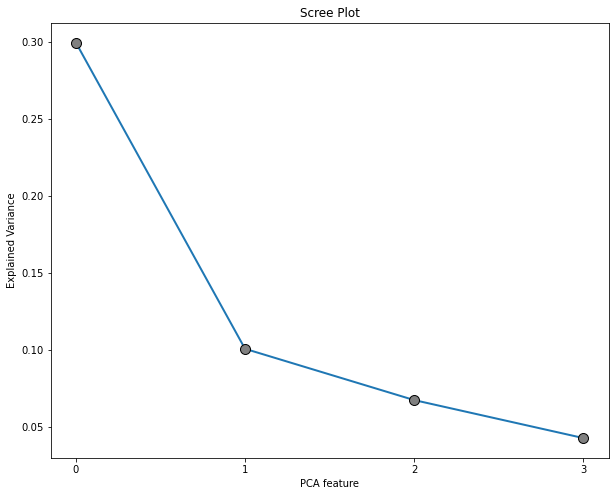

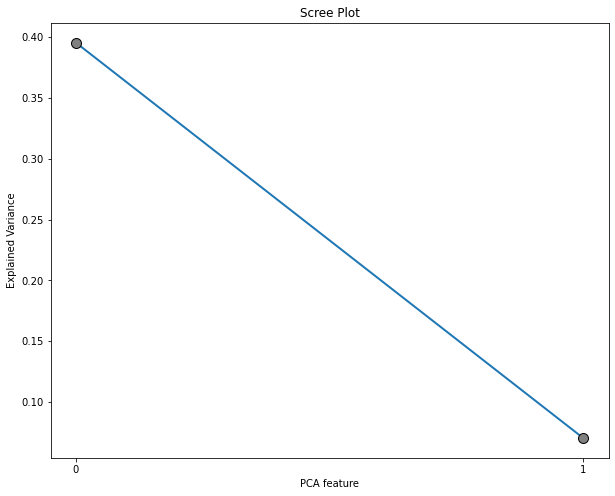

In [6]:
# instantiating a PCA object 
pca1 = PCA(n_components = 4,
          random_state = 219)


# fitting and transforming the data
pca_psy = pca1.fit_transform(psy)


# calling the scree_plot function
scree_plot(pca_object = pca1)

# instantiating a PCA object 
pca2 = PCA(n_components = 2,
          random_state = 219)


# fitting and transforming the data
pca_bb = pca2.fit_transform(bb)


# calling the scree_plot function
scree_plot(pca_object = pca2)

The first 4 and 2 components of the principal component analysis for the psychometric and buying behavior survey answers capture the majority of the data's variance. Any additional components would not be worth analyzing as they only account for very small portions of variance amongst the responses. 

In [7]:
# transposing pca psy components
factor_loadings_psy = pd.DataFrame(np.transpose(pca1.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_psy = factor_loadings_psy.set_index(psy.columns)


In [8]:
# transposing pca psy components
factor_loadings_bb = pd.DataFrame(np.transpose(pca2.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_bb = factor_loadings_bb.set_index(bb.columns)


# PCA Findings

Taking a closer look at the principal components derived from the PCA and the traits that stand out through the survey answers, the following names summarize our findings:

<strong>Early Adopter</strong>

The characteristics for this PC are opinion leaders that are first to try new things. This indicates more daring behavior without fear of consequences. These sort of traits would also align to more outspoken behavior, the type one would expect from extroverts. 

<strong>Mindful Supporter</strong>

Summarizes traits of acting with awareness and thought. Still keeping up with technological developments however more acute to the dangers of having too much technology in daily life. More cautious and careful behavior yet still supportive to new things. Characteristics of the follower within the group rather than the leader of the pack. 

<strong>Tech Groupie</strong>

Strong behavior of buying new technology and gadgets as soon as they are available. Keeping up with technology specifically to gain control in life. Indicates more impulsive behavior which could lead to the feeling of having to regain control again. 

<strong>Tech Geek</strong>

Also incorporates traits of buying new technology and gadgets however additionally knowledge and expertise in the field as well. More controlled and thought through behavior. Characteristics of buying technology to save time and less inclined to use it as a communication tool for friends and family, indicates technology used as a tool for personal purposes rather than to satisfy social needs. 

<strong>Wannabe Influencer</strong>

Summarizes buying behavior characteristics of being attracted to luxury products and designer brands as well as following trends. 

<strong>Frugal & Free</strong>

Indicates the buying behavior of a bargain hunter. Less impulsive spending behavior but valuing the money that they earn and trying to get the most out of it. Characteristics indicate the use of technology for personal pleasure and a source of entertainment rather than as a tool. 



In [9]:
# renaming columns
factor_loadings_psy.columns = ['Early Adopter', 'Mindful Supporter', 'Tech Groupie', 'Tech Geek']

factor_loadings_bb.columns = ['Wannabe Influencer', 'Frugal & Free']


In [10]:
# creating new df for factor loadings psy
psy_factor_loadings = pd.DataFrame(np.transpose(pca1.components_))

psy_factor_loadings = psy_factor_loadings.set_index(psy.columns)

psy_factor_loadings.columns = ['Early Adopter', 'Mindful Supporter', 'Tech Groupie', 'Tech Geek'] 

psy_factor_loadings = pca1.transform(psy)

psy_factor_loadings_df = pd.DataFrame(psy_factor_loadings)

psy_factor_loadings_df.columns = factor_loadings_psy.columns


In [11]:
# printing individual respondents to confirm certain traits

psy_respondents = [0, 96]

print(psy_factor_loadings_df.iloc[psy_respondents, :].round(decimals = 2))

    Early Adopter  Mindful Supporter  Tech Groupie  Tech Geek
0            6.68               1.42         -0.12       0.57
96          14.60               1.07          1.91       2.08


An individual such as Index 0 shows a very high relation to being in the Early adopter group, if you had to target this individual they would likely be someone to download an application on the release day and may be price elastic, using a strategy such a price skimming you would likely capture more initial revenue. 

Looking at respondent Index 96 who could be classified as someone who falls between Tech Geek & Groupie. This individual highly values technology and would be more geared towards an application that is related to smart technology in order to help them maintain control in their lives. 


In [12]:
# creating new df for factor loadings bb
bb_factor_loadings = pd.DataFrame(np.transpose(pca2.components_))

bb_factor_loadings = bb_factor_loadings.set_index(bb.columns)

bb_factor_loadings.columns = ['Wannabe Influencer', 'Frugal & Free'] 

bb_factor_loadings = pca2.transform(bb)

bb_factor_loadings_df = pd.DataFrame(bb_factor_loadings)

bb_factor_loadings_df.columns = factor_loadings_bb.columns

In [13]:
# printing individual respondents to confirm certain traits

bb_respondents = [20]

print(bb_factor_loadings_df.iloc[bb_respondents, :].round(decimals = 2))

    Wannabe Influencer  Frugal & Free
20                4.24           0.03


Index 20 is an individual whom falls under the segment Wannabe Influencer. This individual is attracted to luxury brands and prefers to buy high end design items that follow current trends. An application that would be well market to this individual would be one surrounding the fashion 
industry such as a resale marketplace. 

# Clustering

In [14]:
# grouping together technology usage questions (not used in PCA)
technology_usage = survey[['q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 
                           'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 
                           'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 
                           'q11', 'q12', 'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 
                           'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12']]

# concatinating all questions except for demographic
cluster_data = pd.concat([bb_factor_loadings_df, psy_factor_loadings_df, technology_usage], axis = 1)


In [15]:
#rescaling data
cluster_data_scaled = unsupervised_scaler(df = cluster_data)


In [16]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca = KMeans(n_clusters   = 4,
                        random_state = 219)


# fitting the object to the data
customers_k_pca.fit(cluster_data_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

0    615
3    457
1    312
2    168
Name: Cluster, dtype: int64


In [17]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca_2 = KMeans(n_clusters   = 5,
                        random_state = 219)


# fitting the object to the data
customers_k_pca_2.fit(cluster_data_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca_2 = pd.DataFrame({'Cluster': customers_k_pca_2.labels_})


# checking the results
print(customers_kmeans_pca_2.iloc[: , 0].value_counts())

3    610
2    531
1    328
0     56
4     27
Name: Cluster, dtype: int64


More than four clusters (shown on the right) did not have a representative number of respondents per cluster.

In [18]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Wannabe Influencer', 'Frugal & Free', 'Early Adopter', 
                            'Mindful Supporter', 'Tech Groupie', 'Tech Geek',
                           'Iphone', 'iPod Touch', 'Android', 'BlackBerry', 'Nokia', 'Windows Phone', 'HP', 
                           'Tablet', 'Other Smartphone', 'None','Music/Sound App', 'TV-Check In App', 'Entertainment App',
                            'TV Show App', 'Gaming App', 'Social Media', 'General News App', 'Shopping App', 
                            'Specific News App', 'Other App', 'No App', 
                           '# of Apps', 'Free Apps', 'Facebook', 'Twitter', 'Myspace', 'Pandora Radio', 'Vevo', 
                           'YouTube', 'AOL Radio', 'Last.fm', 'Yahoo E&M', 'IMDB', 'LinkedIn', 'Netflix']


In [19]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         cluster_data],
                          axis = 1) #add columns


#concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey.loc[ : , ['q1', 'q48', 'q49', 'q50r1',
                                                 'q50r2', 'q50r3', 
                                                 'q50r4', 'q50r5', 
                                                 'q54', 'q55','q56', 'q57']],
                                  clst_pca_df.round(decimals = 2)],
                                  axis = 1)



# # dropping unecessary columns
centroids_df_final = final_pca_clust_df.drop(['q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 
                           'q2r8', 'q2r9', 'q2r10', 'q4r2', 'q4r3', 'q4r5',  'q4r7', 'q4r8', 'q4r9', 'q4r10',
                                          'q13r2', 'q13r3', 'q13r4',
                           'q13r6', 'q13r7', 'q13r9', 'q13r10', 'q13r11', 'q13r12'], axis = 1)



# renaming columns
centroids_df_final.columns = ['Age',
                              'Education',
                              'Marital Status',
                              'No Kids',
                              '6yrs< kids',
                              '6-12 kids', 
                              '13-17 kids', 
                              '18+ kids', 
                              'Race', 
                              'Hispanic',
                              'Income',
                              'Gender',
                              'Cluster',
                              'Wannabe Influencer',
                              'Frugal & Free',
                              'Early Adopter',
                              'Mindful Supporter',
                              'Tech Groupie',
                              'Tech Geek',
                              'Iphone',
                              'Music/Sound App',
                              'TV Show App',
                             ' Social Media',
                              'No App',
                              '# of Apps',
                              'Free Apps',
                              'Facebook',
                              'Vevo',
                              'Last.fm']


# Visualising Cluster & Demographic Data

In [20]:
#feature engineering variable income
#grouping income into bins
centroids_df_final['income_bin'] = 0
for index,x in centroids_df_final.iterrows():
    if centroids_df_final.loc[index,'Income']<= 2:
        centroids_df_final.loc[index,'income_bin'] = 14_999
        
    if centroids_df_final.loc[index,'Income'] ==3 or centroids_df_final.loc[index,'Income'] ==4:
        centroids_df_final.loc[index,'income_bin'] = 29_999
        
    if centroids_df_final.loc[index,'Income'] ==5 or centroids_df_final.loc[index,'Income'] ==6:
        centroids_df_final.loc[index,'income_bin'] = 49_999
        
    if centroids_df_final.loc[index,'Income'] ==7 or centroids_df_final.loc[index,'Income'] ==8:
        centroids_df_final.loc[index,'income_bin'] = 69_999
        
    if centroids_df_final.loc[index,'Income'] ==9 or centroids_df_final.loc[index,'Income'] ==10:
        centroids_df_final.loc[index,'income_bin'] = 89_999
        
    if centroids_df_final.loc[index,'Income'] ==11 or centroids_df_final.loc[index,'Income'] ==12:
        centroids_df_final.loc[index,'income_bin'] = 124_999
        
    if centroids_df_final.loc[index,'Income'] ==13 or centroids_df_final.loc[index,'Income'] ==14:
        centroids_df_final.loc[index,'income_bin'] = 150_000

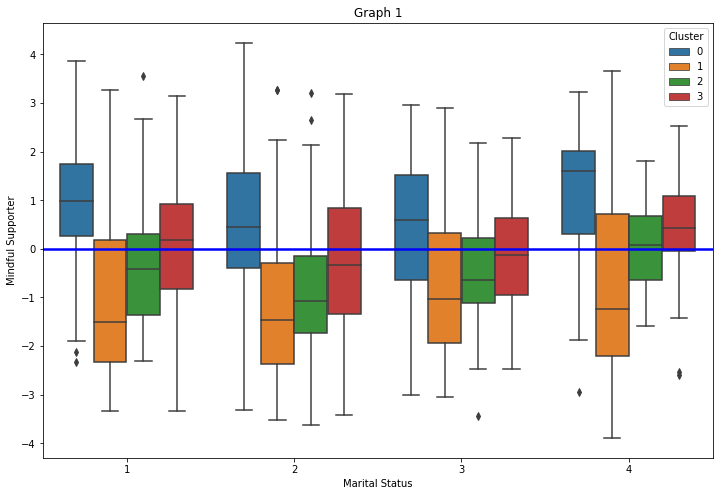

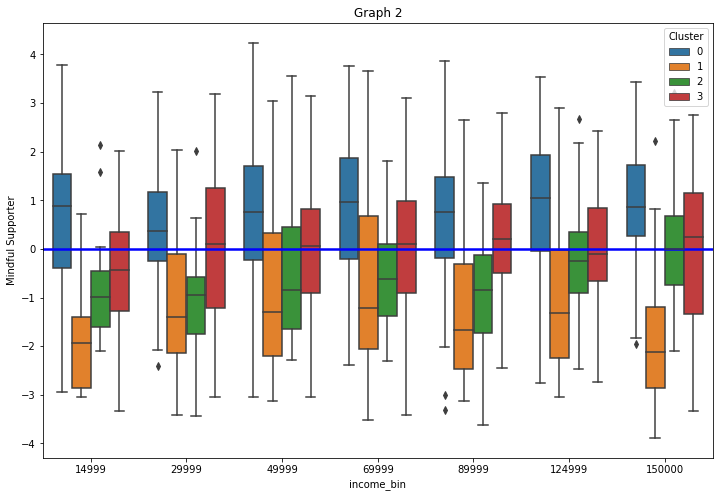

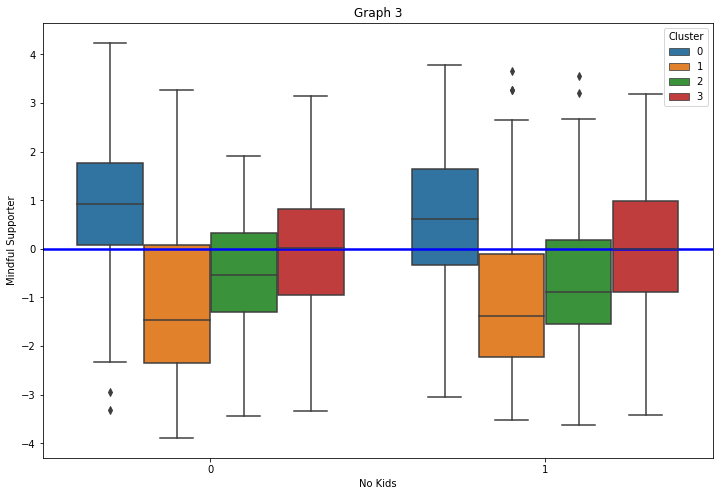

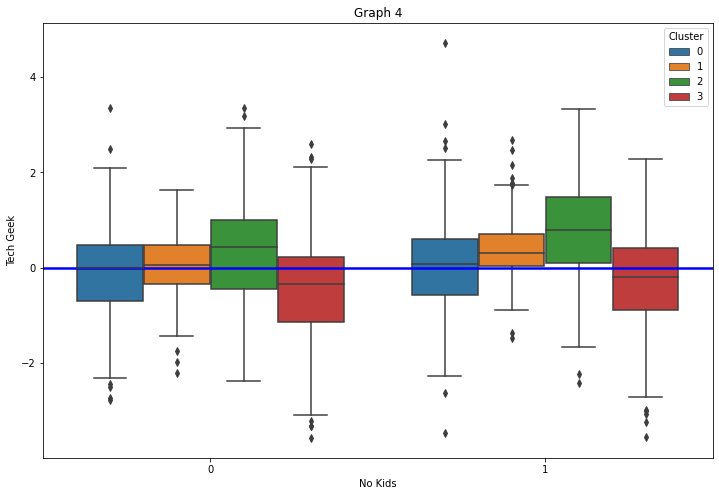

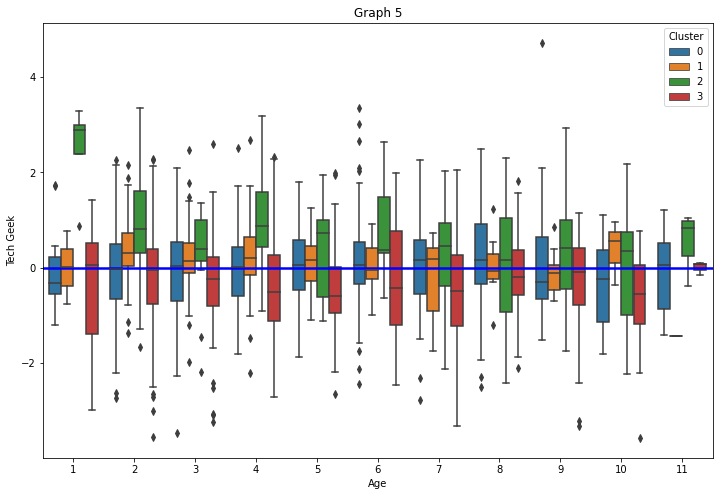

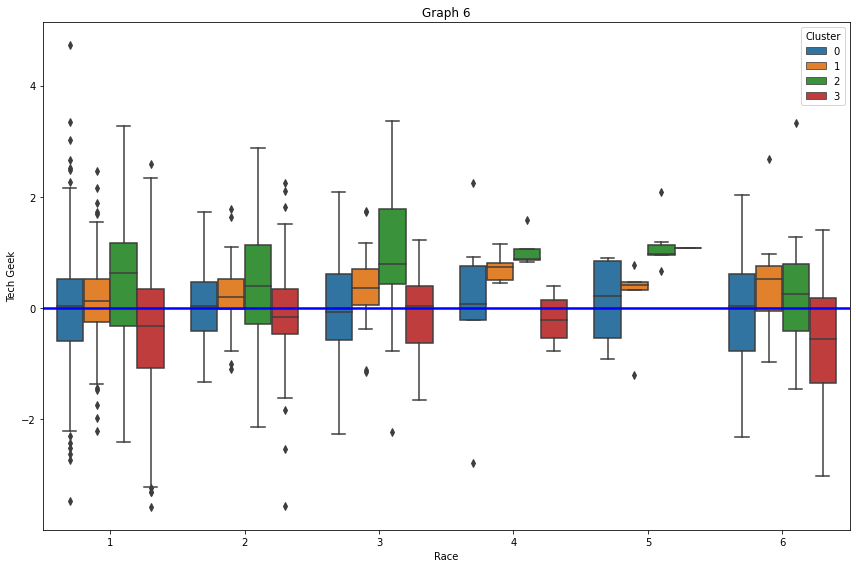

In [22]:
#creating variables for looping through to create graphs
variable   =  [ 'Marital Status','income_bin','No Kids']
variable_2 = ['No Kids', 'Age', 'Race']
title = 0
title2 = 3

for x in variable:
#plot for Mindful Supporter
    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = x,
        y = 'Mindful Supporter',
        hue = 'Cluster',
        data =centroids_df_final )
    
    plt.axhline(0, color = 'blue', ls = "-", lw = 2.5)
    title += 1
    plt.title(label = f'Graph {title}')
        
for x in variable_2:
#plots for Tech Geek
    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = x,
        y = 'Tech Geek',
        hue = 'Cluster',
        data =centroids_df_final )
    plt.axhline(0, color = 'blue', ls = "-", lw = 2.5)
    title += 1
    plt.title(label = title)
    title2 += 1
    plt.title(label = f'Graph {title2}')
    
    
#show plot
plt.tight_layout()
plt.show()

# Cluster Analysis & Recommendations

According to the data respondents can be categorized into four clusters.

<strong>Cluster 0</strong>

This cluster has responded with single & divorced in the survey, resulting in the highest median within the demographic category of marital status (Graph 1). Aligning  with their character trait that was inferred through their answers that they believe responsibility is overrated. This cluster has a strong support for a belief that there is too much technology in everyday life gives the impression that this cluster of people does not update their personal or home technology as often as others (Graph 2). These individuals have the highest likelihood for being in line with owning an iphone which generally has less adaptation between each version. The iphones are well over $1,000 nowadays and understanding this is important to note as this cluster also has more  of a positive standard deviation to be towards the higher income brackets. The thought that responsibility is overrated is attached to this segment of individuals through the strong relationship of the median between all the clusters within the demographic question relating to children. Lastly, the standard deviation for this segment was the largest positive one within the questions relating to social media usage at 0.40. This is significant because this segment tends to be a follower rather than a leader and social media is a literal way to show your support and follow trends (Graph 3). 


<strong>Cluster 1</strong>

This group is more likely to be the bargain hunters of the bunch. These individuals have no problem spending time looking for the best deals out there and will tend to be careful with their hard earned money. This group is less likely to go for the luxury brands compared to other groups, which is in line with other observations. For example, this group is less likely to be an early adopter, and tend to think of themselves as below average when trying out new technology. They will not have the latest or more expensive products . 
One particular niche that can be catered to, is the individuals with no kids, as shown in (graph 4). This group tends to be more technologically savvy, even if they do not buy the new products right away, than the respondents with kids. This makes sense as the group, as a whole, is more inclined to use technology for their entertainment or shopping experience and will use apps more than websites. This can be particularly helpful as these individuals tend to have an additional tablet and buy non-Apple products, which can make them easier to target as consumers. 

<strong>Cluster 2</strong>  

These are your brand ambassadors, keen to try out new products and interested in all things tech. They spend time on social media platforms seeking affirmation from their surroundings. They are outspoken and not afraid to express their opinions and are well informed on the newest tech trends. Technology is a way for them to connect with people and have their voice heard. 
Targeting this segment is best done over these social media websites. Converting them to app usage will go hand in hand in increasing the app users. The bigger the network the more likely they are to convert. 
Demographically under 18 year olds are ideal to target as they have a strong interest in latest tech gadgets and see themselves as a resource for others to share their knowledge and opinions on new products (Graph 5). Additionally, the Asian race shows similar characteristics (Graph 6). Higher income respondents show a greater tendency of being attracted to luxury and brand products as well as becoming more aware of the technology saturation in everyday life (Graph 2).  It is crucial to keep this customer segment convinced and happy about the product, since they have quite a large influence on their surroundings and will talk about your brand according to their experience with it. 

<strong>Cluster 3</strong>

Having new experience can help people feel happier and are more likely to take risks. This group of people enjoy spending on luxury and appreciate brand products. Meaning that they do not look for bargain deals like other consumers. Still having a social aspect, this group however does not spend much screen time on phones. This group appreciates to spend more time with friends, at work or education and taking care of kids, resulting in lower phone usage. Since they are less likely to spend time on their phone, they are less likely to upgrade each year for a new one. This could be because for them it is not necessarily to have the best and new feature that these devices have every year. Paying for apps is not an option for them as the SD is the only positive on at 0.44 amongst all the clusters. Besides making it very simple to discover new apps that can do basically the same, they do not have time to spend on their phones. Using their phone for basic things like communication and music are more frequent. Apps like Twitter can be used to see the biggest news or events of that day and LinkedIn to stay connected with colleagues and active job research are among the things that this group can show interest in.